In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

In [17]:
# Load the time series data
data = pd.read_csv('ts_terraced.csv', parse_dates=['Date'], index_col='Date')

In [18]:
data.head()

,Terraced
Date,
1995-01-31,13426
1995-02-28,13323
1995-03-31,18688
1995-04-30,15579
1995-05-31,17676


<Figure size 1000x600 with 0 Axes>

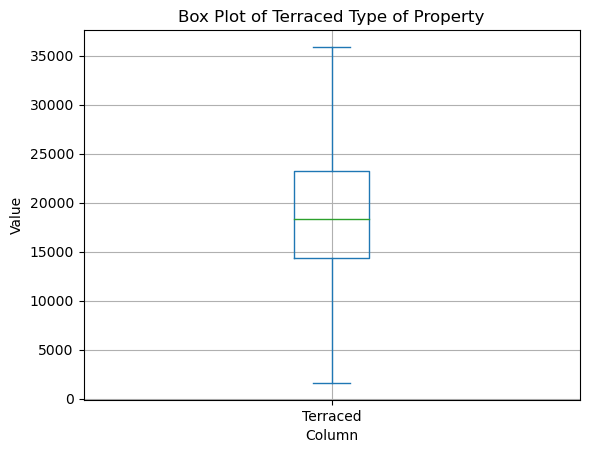

In [20]:
# Create the box plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
data.plot(kind="box")
plt.title("Box Plot of Terraced Type of Property")
plt.xlabel("Column")
plt.ylabel("Value")
plt.grid(True)

# Display the plot
plt.show()

In [4]:
# Ensure the data is in monthly frequency
#data = data.resample('M').sum()

In [5]:
# Decompose the time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(data, model='additive')

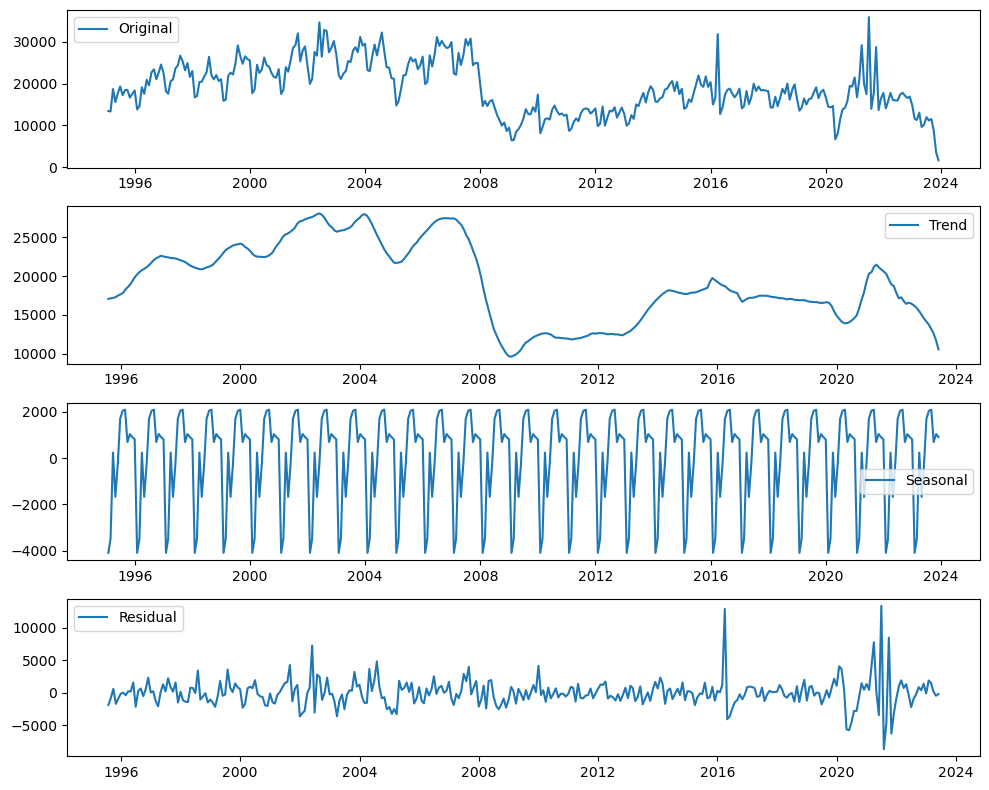

In [11]:
# Plot the decomposed components
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(data, label='Original')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()

In [12]:
# ARIMA model
model = ARIMA(data, order=(5,1,0))
results = model.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [13]:
# Predictions
n_periods = 12  # number of periods to forecast
forecast = results.forecast(steps=n_periods)

In [14]:
print(forecast)

2023-12-31    3223.652823
2024-01-31    2255.793036
2024-02-29    1883.040962
2024-03-31    2447.466888
2024-04-30    2128.587331
2024-05-31    2080.319187
2024-06-30    2255.141763
2024-07-31    2139.986868
2024-08-31    2143.368093
2024-09-30    2194.011001
2024-10-31    2153.584008
2024-11-30    2160.368536
Freq: M, Name: predicted_mean, dtype: float64


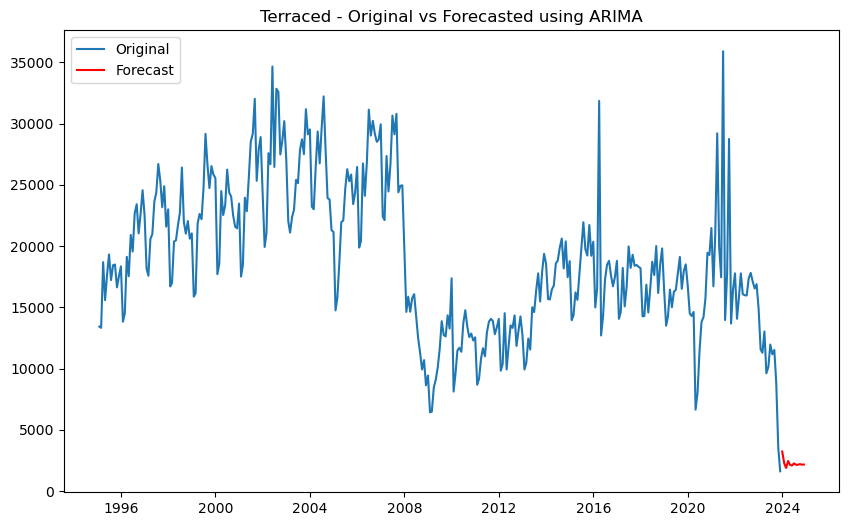

In [15]:
# Plotting original and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(data, label='Original')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Terraced - Original vs Forecasted using ARIMA')
plt.legend()
plt.show()
